In [21]:
import collections
import csv
import re
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pn
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [22]:
#['sentence','sentence']
spamList = []
hamList = []

#{'word':count}
arrWord_Spam = {}
arrWord_Ham = {}

porter = PorterStemmer()

In [23]:
def stemSentence(sentence):
    token_words = word_tokenize(sentence)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [24]:
def add_and_count(someList,outputArr):
    for item in someList:
        split_words = word_tokenize(item)
        for word in split_words:
            #print(word)
            if not  word in outputArr :
                outputArr[word] = 1
            else:
                outputArr[word] += 1

In [25]:
def openFile_fillArrays():
    with open("input/sms-spam-corpus.csv", newline='') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=",")
        i = 1
        for row in reader:
            i += 1
            if row['v1'] =='spam':
                spamList.append(stemSentence((re.sub(r'[^a-zA-Z ]', r'', row['v2'])).lower()))
            else:
                hamList.append(stemSentence((re.sub(r'[^a-zA-Z ]', r'', row['v2'])).lower()))
    csvfile.close()

In [26]:
def fillSpamFile():
    w = csv.writer(open("output/spam.csv", "w"))
    tmp = collections.OrderedDict(sorted(arrWord_Spam.items()))
    for key, val in tmp.items():
        w.writerow(['word: ', key ,' amount: ', val])

In [27]:
def fillHamFile():
    w = csv.writer(open("output/ham.csv", "w"))
    for key, val in arrWord_Ham.items():
        w.writerow(['word: ', key ,' amount: ', val])

In [28]:
openFile_fillArrays()
add_and_count(spamList, arrWord_Spam)
add_and_count(hamList, arrWord_Ham)

fillHamFile()
fillSpamFile()

In [29]:
def countAvg(arr):
    t_len = 0
    t_val = 0
    for key, value in arr.items():
        t_len += len(key)*value
        t_val += value
    return t_len/t_val

In [30]:
def getCountWordsLength(list):
    result = []
    for item in list:
        if item:
            result.append(len(item))
    return result

In [31]:
def getCountMessagesLength(spamList):
    result = []
    for text in spamList:
        if text:
            result.append(len(text))
    return result

In [32]:
def countAvgSentence(list):
    count = 0
    sum = 0
    for item in list:
        if item:
            sum += len(item)
            count += 1
    return sum//count

In [33]:
#1ый график
print('Средняя длина слова- spam: ',countAvg(arrWord_Spam))
print('Средняя длина слова- ham : ',countAvg(arrWord_Spam))

lengthSpam = getCountWordsLength(arrWord_Spam)
lengthHam = getCountWordsLength(arrWord_Ham)

countWordsLengthSpam = Counter(lengthSpam)
countWordsLengthHam = Counter(lengthHam)

hamWordsLength = pn.DataFrame(countWordsLengthHam.most_common(), columns=['word','count'])
spamWordsLength =pn.DataFrame(countWordsLengthSpam.most_common(), columns=['word','count'])

Средняя длина слова- spam:  4.113176530096105
Средняя длина слова- ham :  4.113176530096105


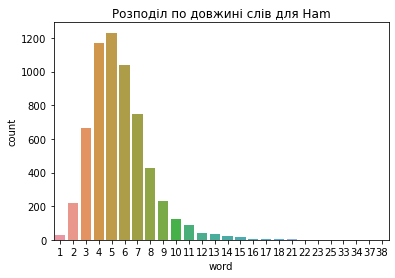

In [34]:
sns.barplot(x='word', y='count', data=hamWordsLength)
plt.title("Розподіл по довжині слів для Ham")
plt.savefig('output/png/First-graphics-Ham.png')
plt.show()

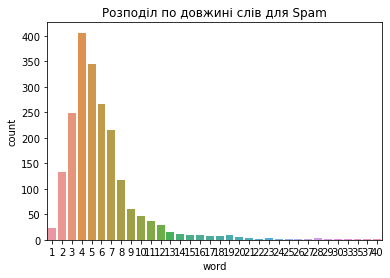

In [35]:
sns.barplot(x='word', y='count', data=spamWordsLength)
plt.title("Розподіл по довжині слів для Spam")
plt.savefig('output/png/First-graphics-Spam.png')
plt.show()

In [36]:
#2ый график
print('Средняя длина сообщения - spam: ' ,countAvgSentence(spamList))
print('Средняя длина сообщения - ham: ' ,countAvgSentence(hamList))

lengthSpamMessage = getCountMessagesLength(spamList)
lengthHamMessage =  getCountMessagesLength(hamList)

countSpamMessage = Counter(lengthSpamMessage)
countHamMessage = Counter(lengthHamMessage)

messageSpam = pn.DataFrame(countSpamMessage.most_common(), columns=['message','count'])
messageHam = pn.DataFrame(countHamMessage.most_common(), columns=['message','count'])

Средняя длина сообщения - spam:  108
Средняя длина сообщения - ham:  63


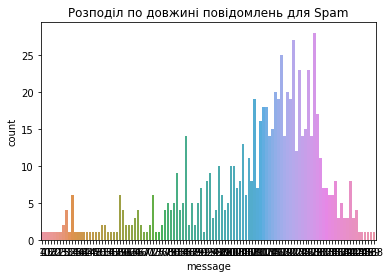

<Figure size 432x288 with 0 Axes>

In [42]:
sns.barplot(x='message', y='count', data=messageSpam)
plt.title("Розподіл по довжині повідомлень для Spam")
plt.show()
plt.savefig('output/png/Second-graphics-Spam.png')

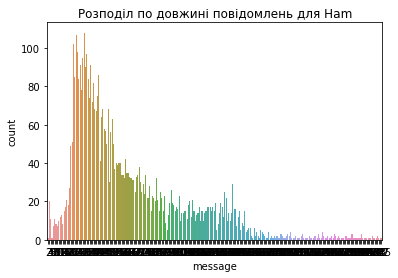

<Figure size 432x288 with 0 Axes>

In [43]:
sns.barplot(x='message', y='count', data=messageHam)
plt.title("Розподіл по довжині повідомлень для Ham")
plt.show()
plt.savefig('output/png/Second-graphics-Ham.png')

In [39]:
#3ий график
countHam = Counter(arrWord_Spam)
countSpam = Counter(arrWord_Ham)
hams20= pn.DataFrame(countHam.most_common(20), columns=['word','count'])
spams20= pn.DataFrame(countSpam.most_common(20), columns=['word','count'])

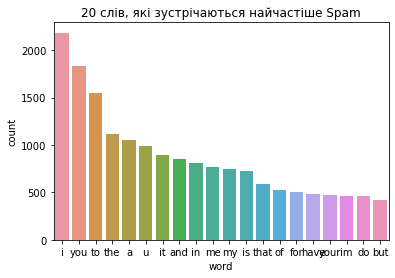

<Figure size 432x288 with 0 Axes>

In [40]:
sns.barplot(x='word', y='count', data=spams20)
plt.title("20 слів, які зустрічаються найчастіше Spam")
plt.show()
plt.savefig('output/png/Third-graphics-Spam.png')

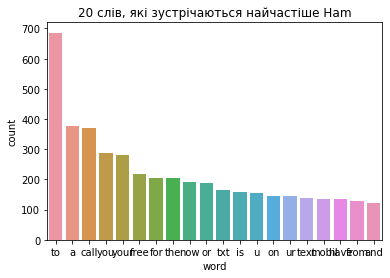

<Figure size 432x288 with 0 Axes>

In [41]:
sns.barplot(x='word', y='count', data=hams20)
plt.title("20 слів, які зустрічаються найчастіше Ham")
plt.show()
plt.savefig('output/png/Third-graphics-Ham.png')